In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
print(df.head(3))

   ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  

[3 rows x 202 columns]


In [4]:
df = df.drop(columns=['ID_code'])

In [5]:
df = df.rename(index=str, columns={"target": "y"})

In [6]:
print(df.head(3))

   y    var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
0  0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266   
1  0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338   
2  0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155   

    var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0 -4.9200  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  3.1468  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2 -4.9193  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  
2   8.2675  14.7222   0.3965  

[3 rows x 201 columns]


In [7]:
X = df.iloc[:,1:201]
print(X)

          var_0   var_1    var_2    var_3    var_4    var_5   var_6    var_7  \
0        8.9255 -6.7863  11.9081   5.0930  11.4607  -9.2834  5.1187  18.6266   
1       11.5006 -4.1473  13.8588   5.3890  12.3622   7.0433  5.6208  16.5338   
2        8.6093 -2.7457  12.0805   7.8928  10.5825  -9.0837  6.9427  14.6155   
3       11.0604 -2.1518   8.9522   7.1957  12.5846  -1.8361  5.8428  14.9250   
4        9.8369 -1.4834  12.8746   6.6375  12.2772   2.4486  5.9405  19.2514   
5       11.4763 -2.3182  12.6080   8.6264  10.9621   3.5609  4.5322  15.2255   
6       11.8091 -0.0832   9.3494   4.2916  11.1355  -8.0198  6.1961  12.0771   
7       13.5580 -7.9881  13.8776   7.5985   8.6543   0.8310  5.6890  22.3262   
8       16.1071  2.4426  13.9307   5.6327   8.8014   6.1630  4.4514  10.1854   
9       12.5088  1.9743   8.8960   5.4508  13.6043 -16.2859  6.0637  16.8410   
10       5.0702 -0.5447   9.5900   4.2987  12.3910 -18.8687  6.0382  14.3797   
11      12.7188 -7.9750  10.3757   9.010

[200000 rows x 200 columns]


In [8]:
Y = df.iloc[:,0]
print(Y)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        1
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        1
         ..
199970    0
199971    0
199972    0
199973    0
199974    0
199975    0
199976    1
199977    0
199978    0
199979    0
199980    0
199981    1
199982    0
199983    0
199984    0
199985    0
199986    1
199987    0
199988    0
199989    0
199990    1
199991    0
199992    0
199993    0
199994    0
199995    0
199996    0
199997    0
199998    0
199999    0
Name: y, Length: 200000, dtype: int64


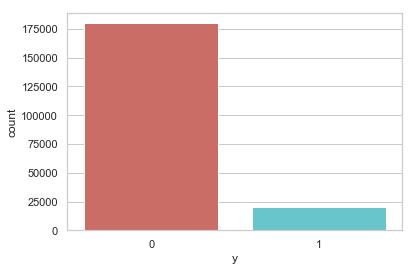

In [9]:
sns.countplot(x='y',data=df, palette='hls')
plt.show()

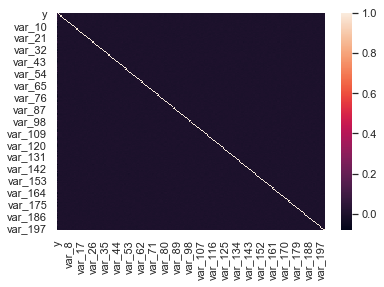

In [10]:
sns.heatmap(df.corr())
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [12]:
X_train.shape

(150000, 200)

In [13]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

C:\Users\abdeetm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[44256   646]
 [ 3737  1361]]


In [15]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


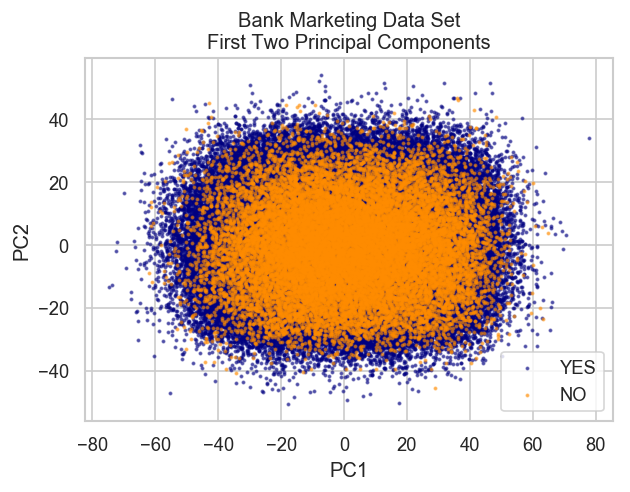

In [16]:
from sklearn.decomposition import PCA
X = df.iloc[:,1:]
y = df.iloc[:,0]
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.title('Bank Marketing Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

C:\Users\abdeetm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


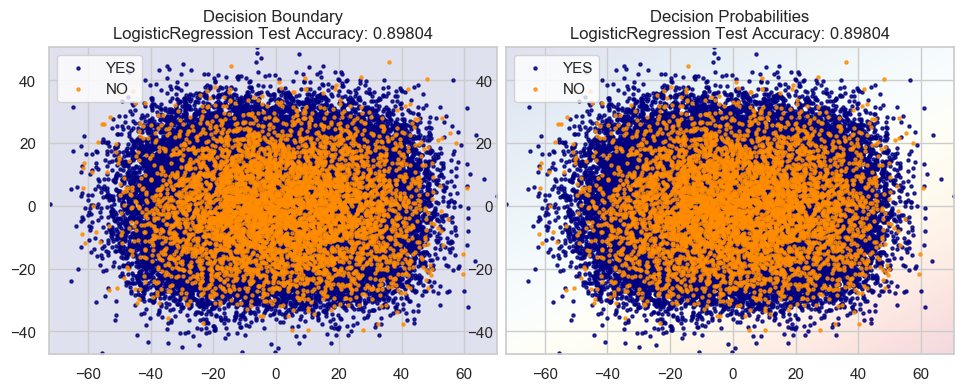

In [17]:
def plot_bank(X, y, fitted_model):
    plt.figure(figsize=(9.8,5), dpi=100)
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)
        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.8, label='YES', s=5, color='navy')
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.8, label='NO', s=5, color='darkorange')
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        plt.tight_layout()
        plt.legend()
        plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)
model = LogisticRegression()
model.fit(X_train,y_train)
plot_bank(X_test, y_test, model)
plt.show()

In [18]:
df_test= pd.read_csv('../data/test.csv')

In [19]:
print(df_test)

            ID_code    var_0    var_1    var_2    var_3    var_4    var_5  \
0            test_0  11.0656   7.7798  12.9536   9.4292  11.4327  -2.3805   
1            test_1   8.5304   1.2543  11.3047   5.1858   9.1974  -4.0117   
2            test_2   5.4827 -10.3581  10.1407   7.0479  10.2628   9.8052   
3            test_3   8.5374  -1.3222  12.0220   6.5749   8.8458   3.1744   
4            test_4  11.7058  -0.1327  14.1295   7.7506   9.1035  -8.5848   
5            test_5   5.9862  -2.2913   8.6058   7.0685  14.2465  -8.6761   
6            test_6   8.4624  -6.1065   7.3603   8.2627  12.0104  -7.2073   
7            test_7  17.3035  -2.4212  13.3989   8.3998  11.0777   9.6449   
8            test_8   6.9856   0.8402  13.7161   4.7749   8.6784 -13.7607   
9            test_9  10.3811  -6.9348  14.6690   9.0941  11.9058 -10.8018   
10          test_10   8.3431  -4.1427   9.1985   9.8229  11.2494   2.9678   
11          test_11  10.6137  -2.1898   8.9090   3.8014  13.8602  -5.9802   

In [20]:
df_x_test = df_test.drop(columns = ['ID_code'])

In [21]:
print (df_test)

            ID_code    var_0    var_1    var_2    var_3    var_4    var_5  \
0            test_0  11.0656   7.7798  12.9536   9.4292  11.4327  -2.3805   
1            test_1   8.5304   1.2543  11.3047   5.1858   9.1974  -4.0117   
2            test_2   5.4827 -10.3581  10.1407   7.0479  10.2628   9.8052   
3            test_3   8.5374  -1.3222  12.0220   6.5749   8.8458   3.1744   
4            test_4  11.7058  -0.1327  14.1295   7.7506   9.1035  -8.5848   
5            test_5   5.9862  -2.2913   8.6058   7.0685  14.2465  -8.6761   
6            test_6   8.4624  -6.1065   7.3603   8.2627  12.0104  -7.2073   
7            test_7  17.3035  -2.4212  13.3989   8.3998  11.0777   9.6449   
8            test_8   6.9856   0.8402  13.7161   4.7749   8.6784 -13.7607   
9            test_9  10.3811  -6.9348  14.6690   9.0941  11.9058 -10.8018   
10          test_10   8.3431  -4.1427   9.1985   9.8229  11.2494   2.9678   
11          test_11  10.6137  -2.1898   8.9090   3.8014  13.8602  -5.9802   

In [22]:
y_pred = classifier.predict(df_x_test)
df_y = pd.DataFrame(y_pred)
df_submission = pd.merge(pd.DataFrame(df_test['ID_code']),df_y,left_index=True,right_index=True)

In [23]:
df_submission = df_submission.rename(columns={0: 'target'})
print(df_submission)

            ID_code  target
0            test_0       0
1            test_1       0
2            test_2       0
3            test_3       0
4            test_4       0
5            test_5       0
6            test_6       0
7            test_7       0
8            test_8       0
9            test_9       0
10          test_10       0
11          test_11       0
12          test_12       0
13          test_13       0
14          test_14       0
15          test_15       0
16          test_16       0
17          test_17       0
18          test_18       0
19          test_19       0
20          test_20       0
21          test_21       0
22          test_22       0
23          test_23       0
24          test_24       0
25          test_25       0
26          test_26       0
27          test_27       0
28          test_28       0
29          test_29       0
...             ...     ...
199970  test_199970       0
199971  test_199971       0
199972  test_199972       0
199973  test_199973 

In [24]:
df_submission.to_csv('../data/submit1.csv', encoding='utf-8', index=False)

(array([193791.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   6209.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

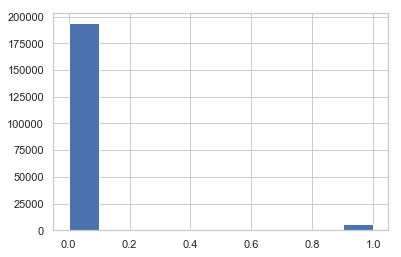

In [25]:
plt.hist(y_pred)

(array([179902.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  20098.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

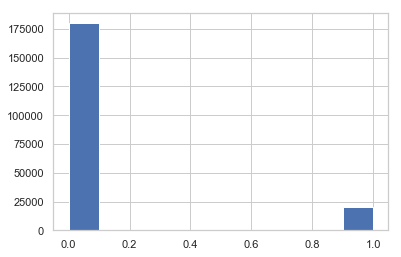

In [26]:
plt.hist(Y)

In [ ]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  

In [ ]:
y_pred2 = svclassifier.predict(X_test)
df_y2 = pd.DataFrame(y_pred2)
df_submission2 = pd.merge(pd.DataFrame(df_test['ID_code']),df_y2,left_index=True,right_index=True)
df_submission2 = df_submission2.rename(columns={0: 'target'})
df_submission2.to_csv('../data/submit2.csv', encoding='utf-8', index=False)

In [ ]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

In [ ]:
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))  